In [59]:
# general
import os

# data manipulation
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import numpy

# preprocessing
from sklearn.preprocessing import RobustScaler

# feature selection

# model selection
from sklearn.model_selection import train_test_split

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# validation
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import cross_validate, cross_val_score

# hyperparameter optimization
from skopt import BayesSearchCV
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from geneticalgorithm import geneticalgorithm as ga
import pygad

# visualization
from matplotlib import pyplot as plt
from skopt.plots import plot_convergence

%matplotlib inline

In [22]:
def skot_hyperopt(space, model, x, y):
    @use_named_args(space)
    def objective(**params):
        model.set_params(**params)

        return -np.mean(cross_val_score(model, x, y, cv=5, n_jobs=-1,
                                        scoring="accuracy"))
    res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)
    return res_gp

In [3]:
data = load_iris()
x = pd.DataFrame(data['data'], 
                 columns=data['feature_names'])
y = data['target']

In [4]:
xtrn, xtst, ytrn, ytst = train_test_split(x,y,test_size=0.2)

In [5]:
robustTransformer = RobustScaler().fit(xtrn)
xtrn = robustTransformer.transform(xtrn)

In [6]:
lr = LogisticRegression()
scoring = ('accuracy', 'r2')
cvScr = cross_validate(lr,xtrn,ytrn,cv=5, 
                       scoring=scoring, 
                       return_train_score=True)

In [7]:
cvScr['test_accuracy'].mean()

0.9416666666666667

In [8]:
?LogisticRegression

In [9]:
rfc = RandomForestClassifier(max_features = "sqrt", 
                             oob_score=True)
rfcCV = cross_validate(rfc,xtrn,ytrn,cv=5, 
                       scoring=scoring, 
                       return_train_score=True)

In [10]:
rfcCV['test_accuracy'].mean()

0.9416666666666668

In [11]:
?RandomForestClassifier

In [12]:
rfc = RandomForestClassifier()

# hyperopt

In [28]:

space  = [  Integer(10, 100, name='n_estimators'),
            Integer(10, 100, name='max_depth'),
            Integer(1, 100, name='min_samples_leaf'),
            Integer(2, 50, name='min_samples_split') #,
            #Categorical(['auto', 'sqrt', 'log2'], name='max_features')
         ]

res_gp_rf = skot_hyperopt(space, rfc, xtrn, ytrn)

/home/alex/.local/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/alex/.local/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best score=-0.9583
Best parameters:
n_estimators=10
max_depth=10
min_samples_leaf=1
min_samples_split=2



<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

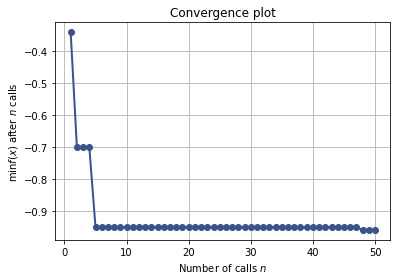

In [29]:
print("Best score=%.4f" % res_gp_rf.fun)
print("""Best parameters:
n_estimators=%d
max_depth=%d
min_samples_leaf=%d
min_samples_split=%d
""" % (res_gp_rf.x[0], res_gp_rf.x[1],res_gp_rf.x[2], res_gp_rf.x[3]))
plot_convergence(res_gp_rf)

In [30]:
?RandomForestClassifier

# hyperopt wrapper

In [13]:
params = {
    "n_estimators":Integer(10, 500),
    'max_depth':Integer(10, 100),
    'min_samples_leaf':Integer(1, 100),
    'min_samples_split':Integer(2, 50),
    'max_features':Categorical(['auto', 'sqrt', 'log2'])
        }
opt = BayesSearchCV(rfc,
                    params,
                    cv=5,
                    n_iter=50,
                    random_state=0)

In [16]:
optres = opt.fit(xtrn, ytrn)

/home/alex/.local/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/alex/.local/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/alex/.local/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/alex/.local/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/alex/.local/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scor

/home/alex/.local/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/alex/.local/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/alex/.local/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/alex/.local/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/alex/.local/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scor

In [18]:
optres.best_params_

OrderedDict([('max_depth', 100),
             ('max_features', 'auto'),
             ('min_samples_leaf', 10),
             ('min_samples_split', 2),
             ('n_estimators', 10)])

In [19]:
optres.best_score_

0.9583333333333334

# genetic algorithm

In [34]:
function_inputs = [30,50,50,35]


In [47]:
rfc = RandomForestClassifier(n_estimators=function_inputs[0],
                            max_depth=function_inputs[1],
                            min_samples_leaf=function_inputs[2],
                            min_samples_split=function_inputs[3])
rfc.fit(xtrn, ytrn)
rfcCV = cross_validate(rfc, xtrn, ytrn,cv=5,scoring=("accuracy"))


In [65]:
rfcCV

{'fit_time': array([0.04297662, 0.04148245, 0.03989792, 0.03992319, 0.03956437]),
 'score_time': array([0.00376129, 0.00353098, 0.00348139, 0.00377202, 0.00351167]),
 'test_score': array([0.29166667, 0.29166667, 0.33333333, 0.33333333, 0.33333333])}

In [71]:
def fitness_func(solution, solution_idx):
    rfc = RandomForestClassifier(n_estimators=int(solution[0]),
                                max_depth=solution[1],
                                min_samples_leaf=solution[2],
                                min_samples_split=solution[3])
    rfc.fit(xtrn, ytrn)
    rfcCV = cross_validate(rfc, xtrn, ytrn,cv=5,scoring="accuracy")
    fitness = rfcCV['test_score'].mean()
    return fitness

In [82]:
?RandomForestClassifier

In [81]:
import random 

100, 50, 1, 2 
random.gauss(mu=10, sigma=1)

11.922112788072575

In [99]:
startPop = 20
          
          
n_estimators = [random.randint(10,400) for i in range(startPop)]
max_depth = [random.randint(1,100) for i in range(startPop)]
min_samples_leaf = [random.randint(1,25) for i in range(startPop)]
min_samples_split = [random.randint(1,50) for i in range(startPop)]

init_pop = []
for i in range(startPop):
    init_pop.append([n_estimators[i],
                    max_depth[i],
                    min_samples_leaf[i],
                    min_samples_split[i]])

In [109]:
fitness_function = fitness_func

initial_population = init_pop
gene_type = int

gene_space = [[10,400], [1,100], [1,25], [2,50]]
sol_per_pop = 8
num_genes = len(function_inputs)

num_generations = 15
num_parents_mating = 4

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 20

In [110]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       initial_population=initial_population,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       gene_space=gene_space,
                       mutation_percent_genes=mutation_percent_genes)

In [ ]:
ga_instance.run()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))